## Keras api for sequential neural networks

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [46]:
mnist = keras.datasets.mnist

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
y_train.shape, x_train.shape

((60000,), (60000, 28, 28))

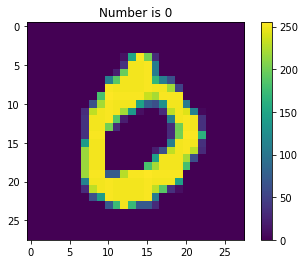

In [53]:
plt.imshow(x_test[3])
plt.title(f'Number is {y_test[3]}')
plt.colorbar()
plt.show()

In [54]:
#normalize x
x_train, x_test = x_train / 255.0, x_test / 255.0

In [55]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #make are 28x28 ims to vectors
    keras.layers.Dense(128, activation='relu'), #layer with an output of 128
    keras.layers.Dense(10), #output with a argmax in the selected number
])

In [56]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [57]:
#loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

In [58]:
#define the loss and optimizer
model.compile(loss=loss, optimizer=optim, metrics=metrics)

Training

In [59]:
batch_size = 64
epochs = 10

In [60]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/10
938/938 - 1s - loss: 0.3075 - accuracy: 0.9138 - 1s/epoch - 1ms/step
Epoch 2/10
938/938 - 1s - loss: 0.1401 - accuracy: 0.9596 - 1s/epoch - 1ms/step
Epoch 3/10
938/938 - 1s - loss: 0.0973 - accuracy: 0.9715 - 1s/epoch - 1ms/step
Epoch 4/10
938/938 - 1s - loss: 0.0729 - accuracy: 0.9783 - 1s/epoch - 1ms/step
Epoch 5/10
938/938 - 1s - loss: 0.0582 - accuracy: 0.9825 - 1s/epoch - 1ms/step
Epoch 6/10
938/938 - 1s - loss: 0.0461 - accuracy: 0.9864 - 1s/epoch - 1ms/step
Epoch 7/10
938/938 - 1s - loss: 0.0378 - accuracy: 0.9887 - 1s/epoch - 1ms/step
Epoch 8/10
938/938 - 1s - loss: 0.0303 - accuracy: 0.9913 - 1s/epoch - 1ms/step
Epoch 9/10
938/938 - 1s - loss: 0.0253 - accuracy: 0.9925 - 1s/epoch - 1ms/step
Epoch 10/10
938/938 - 1s - loss: 0.0201 - accuracy: 0.9944 - 1s/epoch - 1ms/step


Evaluate

In [61]:
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.0822 - accuracy: 0.9768 - 253ms/epoch - 2ms/step


[0.08217785507440567, 0.9768000245094299]

In [63]:
#predictions
prob_model = keras.models.Sequential([
    model, #we pass the entire previous model
    keras.layers.Softmax() #add a softmax layer to normalize probs
])

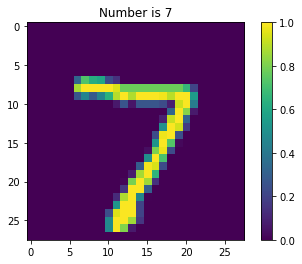

In [67]:
plt.imshow(x_test[0])
plt.title(f'Number is {y_test[0]}')
plt.colorbar()
plt.show()

In [73]:
predictions = prob_model(x_test)
print( np.argmax(predictions[0]) )
#normalize the prdictions with
predictions = tf.nn.softmax(predictions)
print( predictions[0], "\n", np.argmax(predictions[0]) )

7
tf.Tensor(
[0.08533674 0.08533674 0.08533675 0.08533677 0.08533674 0.08533674
 0.08533674 0.23196916 0.08533674 0.08533677], shape=(10,), dtype=float32) 
 7
